In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


> Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of our model. 
According to my experience (not so many 👀), Feature selection and Data cleaning should be the first and most important step of your model designing.
So I want to share what I learned. 🎈

In [4]:
data= pd.read_csv("../input/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
assert data.target.notnull().all()
#returns nothing it means we don't have any nan values.

**> Let's think our problem is guess the risk of heart diseases according to ages. So our target is "age".**

In [30]:
X = data.iloc[:,1:14]  #independent columns (except age)
y = data.iloc[:,0]    #target column i.e age 

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class 

[0.03659861 0.06552595 0.1364778  0.15462569 0.02643435 0.05125539
 0.15455018 0.03133779 0.14190044 0.05381648 0.07466929 0.05426324
 0.01854478]


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


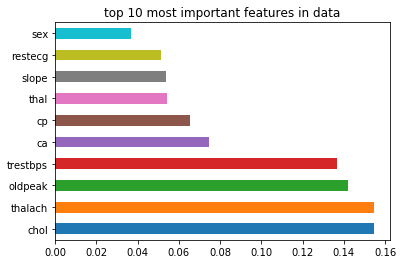

In [37]:
#feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("top 10 most important features in data")
plt.show()

So I can say; chol, thalach, oldpeak, trestbps and ca (maybe cp) are the most important features for this problem.
> Let's think our problem is guess the risk of heart diseases according to cp values. So our target is "cp"

In [68]:
x_data= data.drop(["cp"],axis=1)
X = x_data.iloc[:,0:13]  #independent columns (except cp)
y = data.iloc[:,2]    #target column i.e cp 

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class 

[0.12456533 0.02664233 0.11258264 0.10772547 0.02324422 0.04290535
 0.12155766 0.07778753 0.09864936 0.05575622 0.07232987 0.04740836
 0.08884565]


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


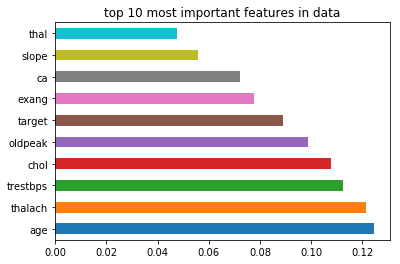

In [72]:
#feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("top 10 most important features in data")
plt.show()

### Another method:

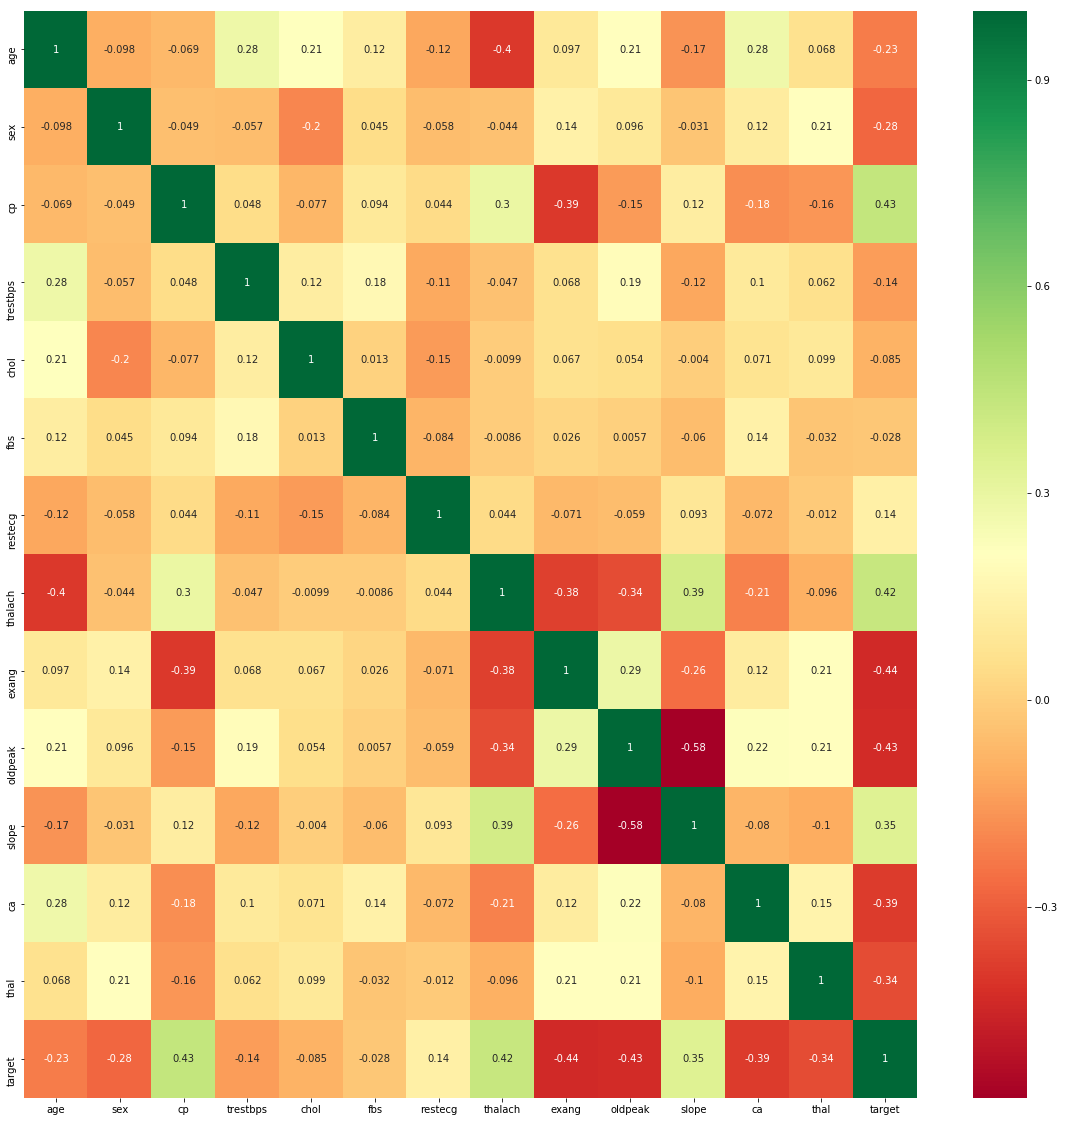

In [74]:
X = x_data.iloc[:,0:13]  #independent columns
y = data.iloc[:,2]    #target column i.e cp
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Also we can use different methods for feature selection. I used "Feature Importance" and "Correlation" methods. Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable, as you can see!

**If I made a mistake in any part, please correct me! Thanks 🎉**